# Assigment 04: Due 10/1

You can use these imports

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit #simpliest scipy fitting method
import scipy.special as sf
%matplotlib notebook

# Problem 1a

Using Monte Carlo techniques discusses in *02_Integration_MC* notebook, solve the following integral and compare it to the exact solution:

$\int_0^2 \frac{2}{(2^2 + x^2)^{3/2}}dx$

In your Monte Carlo integration, use 10,000 random points.

In [11]:
N = 10000
x0 = 0
x1 = 2

def f(x):
    return 2/((4+x**2)**(3/2))


In [12]:
x = np.linspace(x0,x1,N)
#x = np.arange(x0,x1,0.01)
y = f(x)

#print(y)
#get max y
fmax = max(y)
print('fmax = ',fmax)

#generate random data points
x_rand = x0 + (x1 - x0)*np.random.random(N) #between x0 and x1
y_rand = np.random.random(N)*fmax

#fill below and above arrays
ind_below = np.where(y_rand < f(x_rand))
ind_above = np.where(y_rand >= f(x_rand))

#area of the rectangel * the ratio of points below function to total points
ratio = float(len(ind_below[0])/N)
area = (x1-x0)*fmax
integral = ratio*area
print(' ratio: {0}\n area: {1}\n integral: {2}\n'.format(ratio,area,integral))


           

fmax =  0.25
 ratio: 0.7062
 area: 0.5
 integral: 0.3531



# 1b

Make a scatter plot of points below and above the integrand function. This is the some type of graph shown in the *02_Integration_MC* notebook with the blue and green points.

<IPython.core.display.Javascript object>


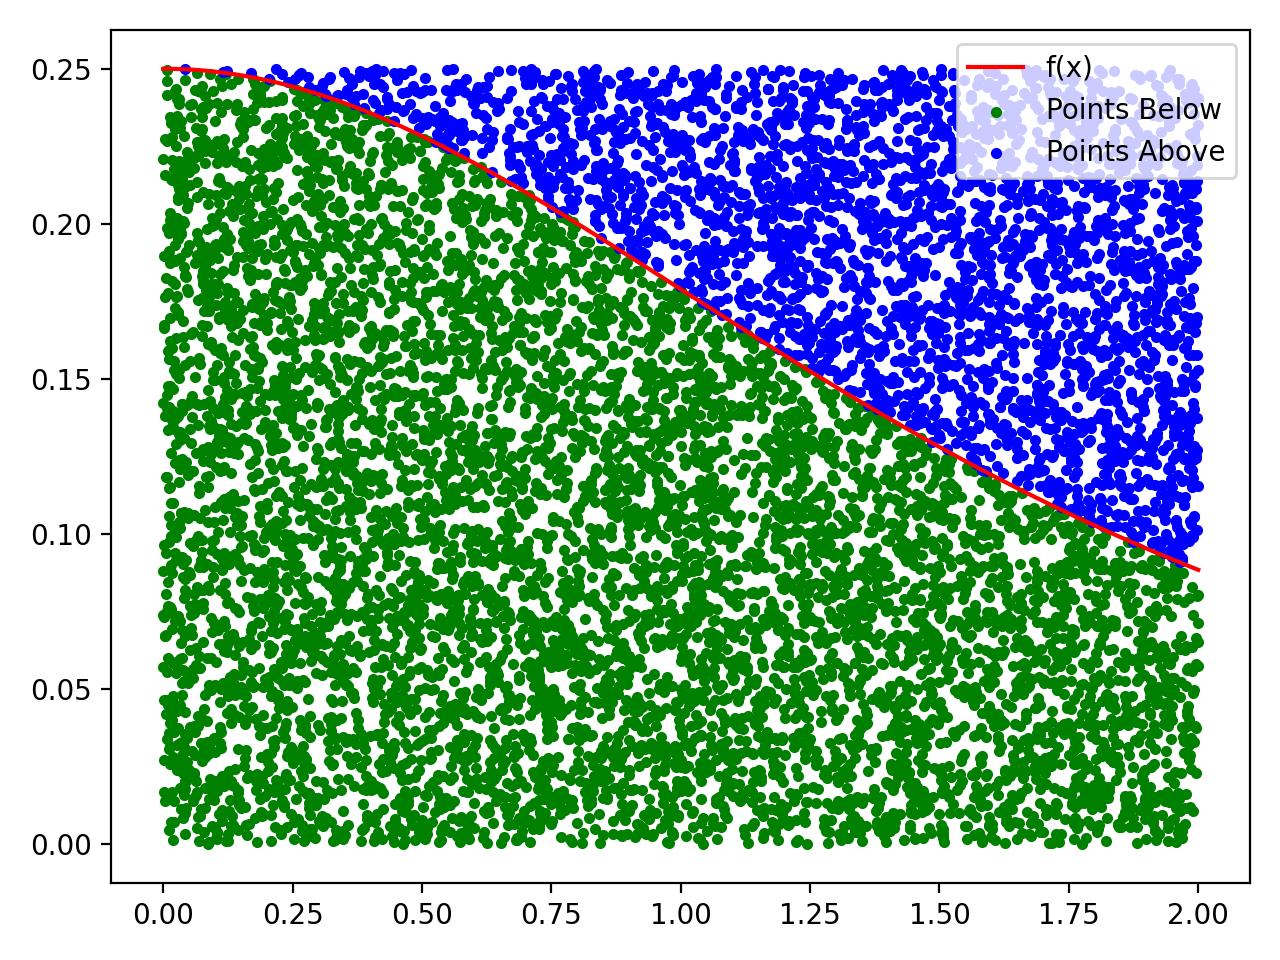

In [13]:
fig = plt.figure('MC Integration')
plt.scatter(x_rand[ind_below], y_rand[ind_below], color = "green", marker = '.',label='Points Below')
plt.scatter(x_rand[ind_above], y_rand[ind_above], color = "blue", marker = '.', label = 'Points Above')
plt.plot(x, y, color = "red", label= 'f(x)')
plt.legend()
plt.tight_layout();

# Problem 2a
Read in the data set *./data/decay_data.txt*, this lists the time in days, number of particles, and the uncertianty on the particles. This is the same radio active decay data set used in our fitting example *Fitting_Lecture_Notes* from Module 2b.

Plot the data with its error bars.


<IPython.core.display.Javascript object>


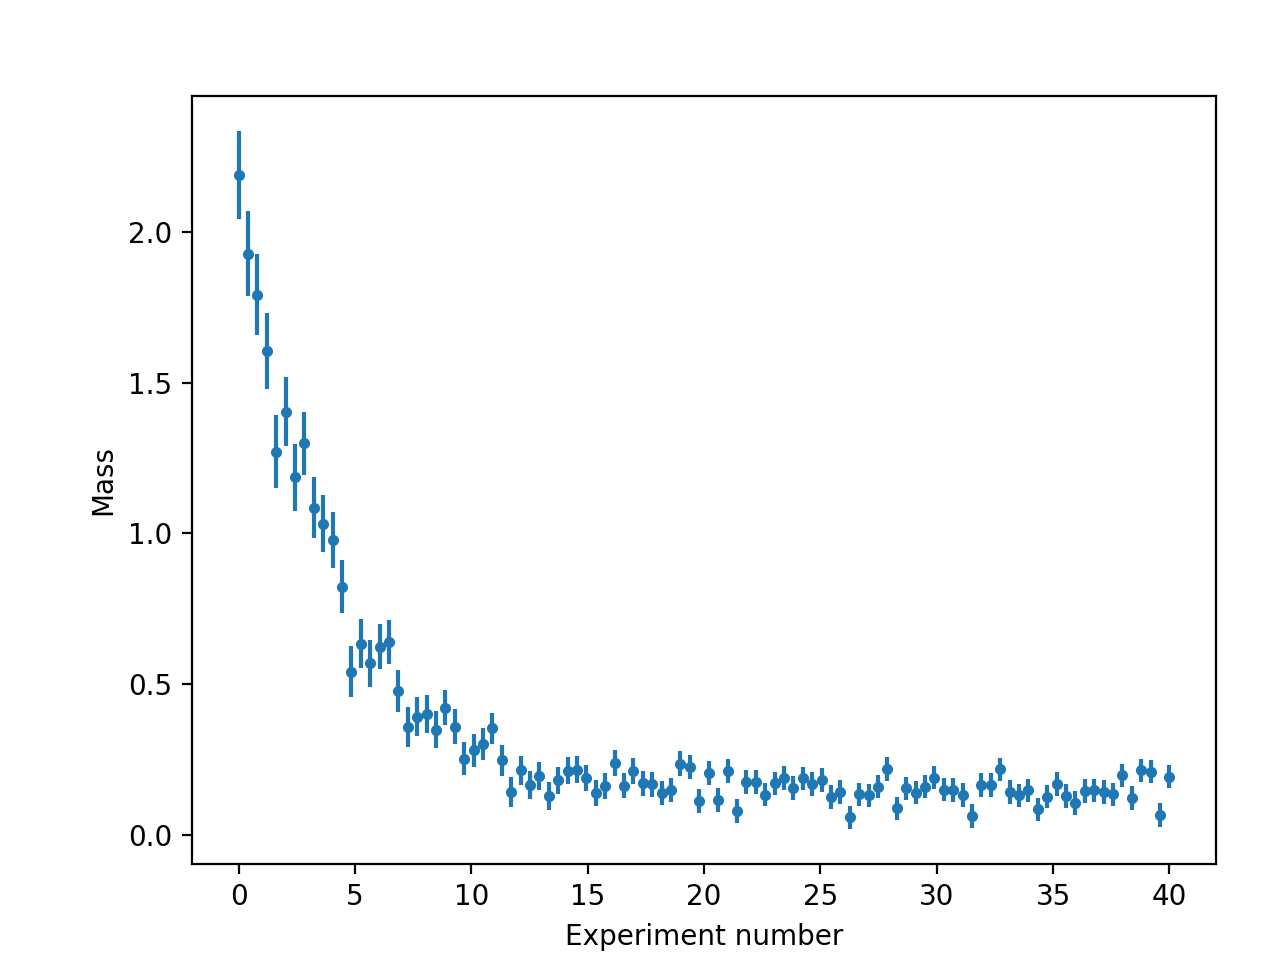

In [14]:
exp_num, mass, unc = np.loadtxt('data/decay_data.txt', unpack = True)



fig = plt.figure()
axes = fig.add_axes([0.15,0.1,0.8,0.8])
axes.errorbar(exp_num, mass, yerr = unc, fmt='.')
axes.set_xlabel('Experiment number')
axes.set_ylabel('Mass');





# Problem 2b

Fit the data with 3 fit parameters using MCMC MH algorithm. You should take 10,000 steps and impliment the random test on $\chi ^2$, like we did our *03_MC_Fit* example notebook using the *get_chi_squared* function. For this we will use a function template of: $y = p_0 \cdot e^{-t/p_1} + p_2$,

where $p_0, p_1$, and $p_2$ are the fit parameters. When fitting you should choose starting values of $p_0 = p_1 = p_2 = 1.0$ to avoid nan errors.

In [66]:
#line function
def fit(t, p0, p1, p2):
    return p0 * np.exp(-t / p1) + p2

def get_chi_squared(x, y, sigma, p):
    return sum([((y[i] - fit(x[i], *p)) / sigma[i]) ** 2 for i in range(0, len(x))])

In [67]:
initial = np.ones(3)
params_list = [initial]
RRs = [get_chi_squared(exp_num, mass, unc, initial)]
for i in range(10000):
    test_params = [np.random.normal(params_list[-1][i], 0.5) for i in range(0,len(params_list[-1]))]
    RR_test = get_chi_squared(exp_num, mass, unc, test_params)
    move = np.random.random() <= (RRs[-1] / RR_test)
    if move:
        params_list.append(test_params)
        RRs.append(RR_test)
    else:
        params_list.append(params_list[-1])
        RRs.append(RRs[-1])

chisq = np.amin(RRs)
besti = RRs.index(chisq)
bestpars = params_list[besti]
print(f'p0 = {bestpars[0]}\np1 = {bestpars[1]}\np2 = {bestpars[2]}\nchi^2 = {chisq}\nloc = {besti}')

<ipython-input-66-94db8081a364>:3: RuntimeWarning: overflow encountered in exp
  return p0 * np.exp(-t / p1) + p2
<ipython-input-66-94db8081a364>:6: RuntimeWarning: overflow encountered in double_scalars
  return sum([((y[i] - fit(x[i], *p)) / sigma[i]) ** 2 for i in range(0, len(x))])
<ipython-input-66-94db8081a364>:3: RuntimeWarning: overflow encountered in double_scalars
  return p0 * np.exp(-t / p1) + p2


p0 = 1.6561136681308068
p1 = 4.627661895922223
p2 = 0.13611921075455333
chi^2 = 135.44999691988235
loc = 156


# Problem 2c

What is the reduced $\chi^2$ of your fit and the p-value?
Is this a good fit?

In [63]:
dof = len(mass) - len(bestpars) - 1
pvalue = sf.gammaincc(dof / 2.0, chisq / 2.0)
print(f'reduced chi2 = {chisq / dof}\n')  
print(f'p-value = {pvalue}')

#the fit is good because the reduced chi squared is close to 1. The p value is also close to zero

chi2 = 122.9477163291423

dof = 96 
 
reduced chi2 = 1.2807053784285656

p-value = 0.03325957077405509


# Problem 2d

Plot on the same graph your data and the line showin the fitted function.

<IPython.core.display.Javascript object>


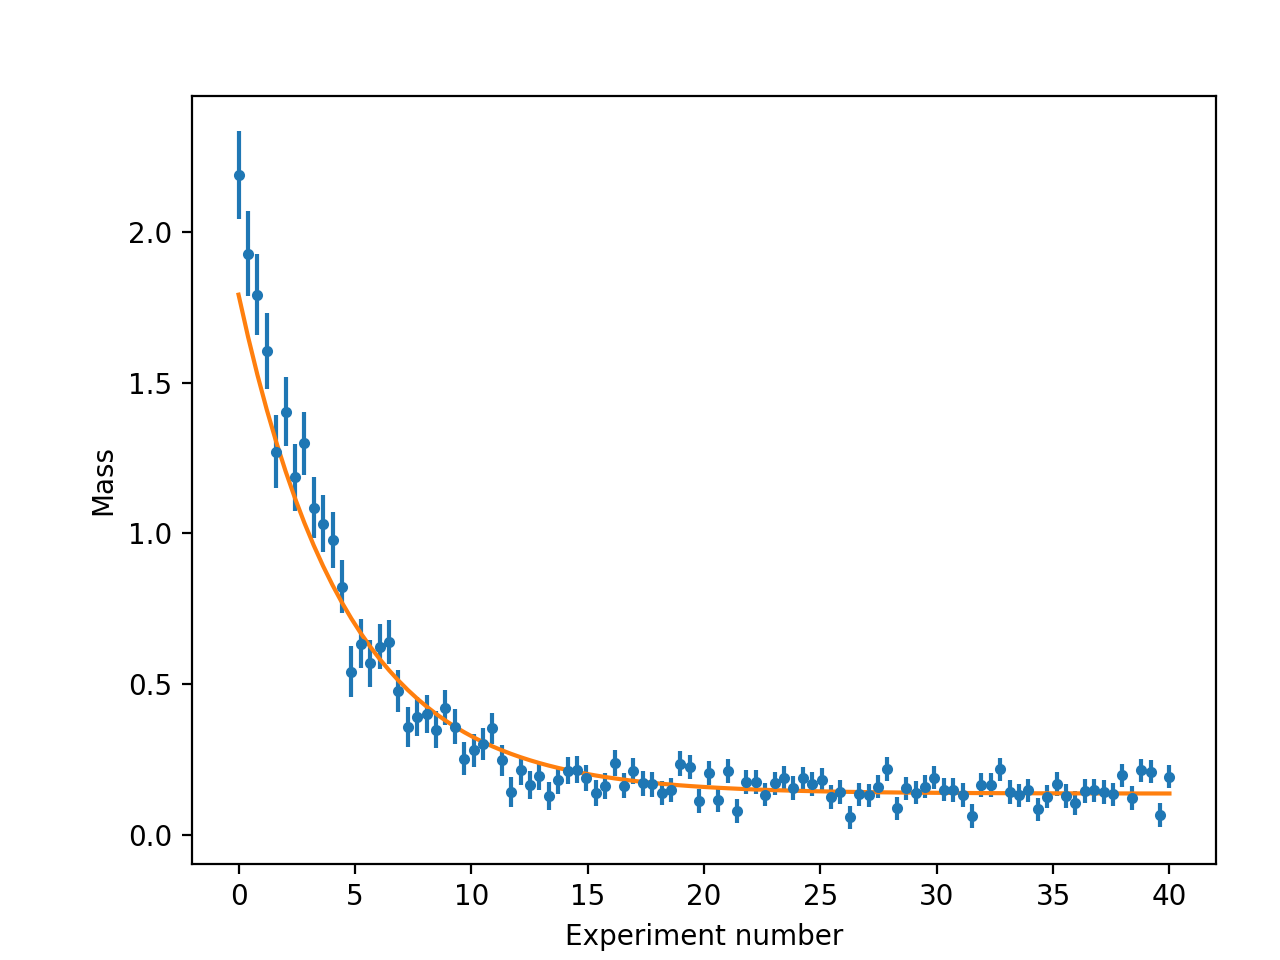

In [68]:
fig = plt.figure()
axes = fig.add_axes([0.15,0.1,0.8,0.8])
axes.errorbar(exp_num, mass, yerr = unc, fmt='.')
axes.set_xlabel('Experiment number')
axes.set_ylabel('Mass');
axes.plot(exp_num, fit(exp_num, *bestpars), label = 'fit')

# Problem 2e

Plot the histogram distributions of the three fit parameters.

<IPython.core.display.Javascript object>


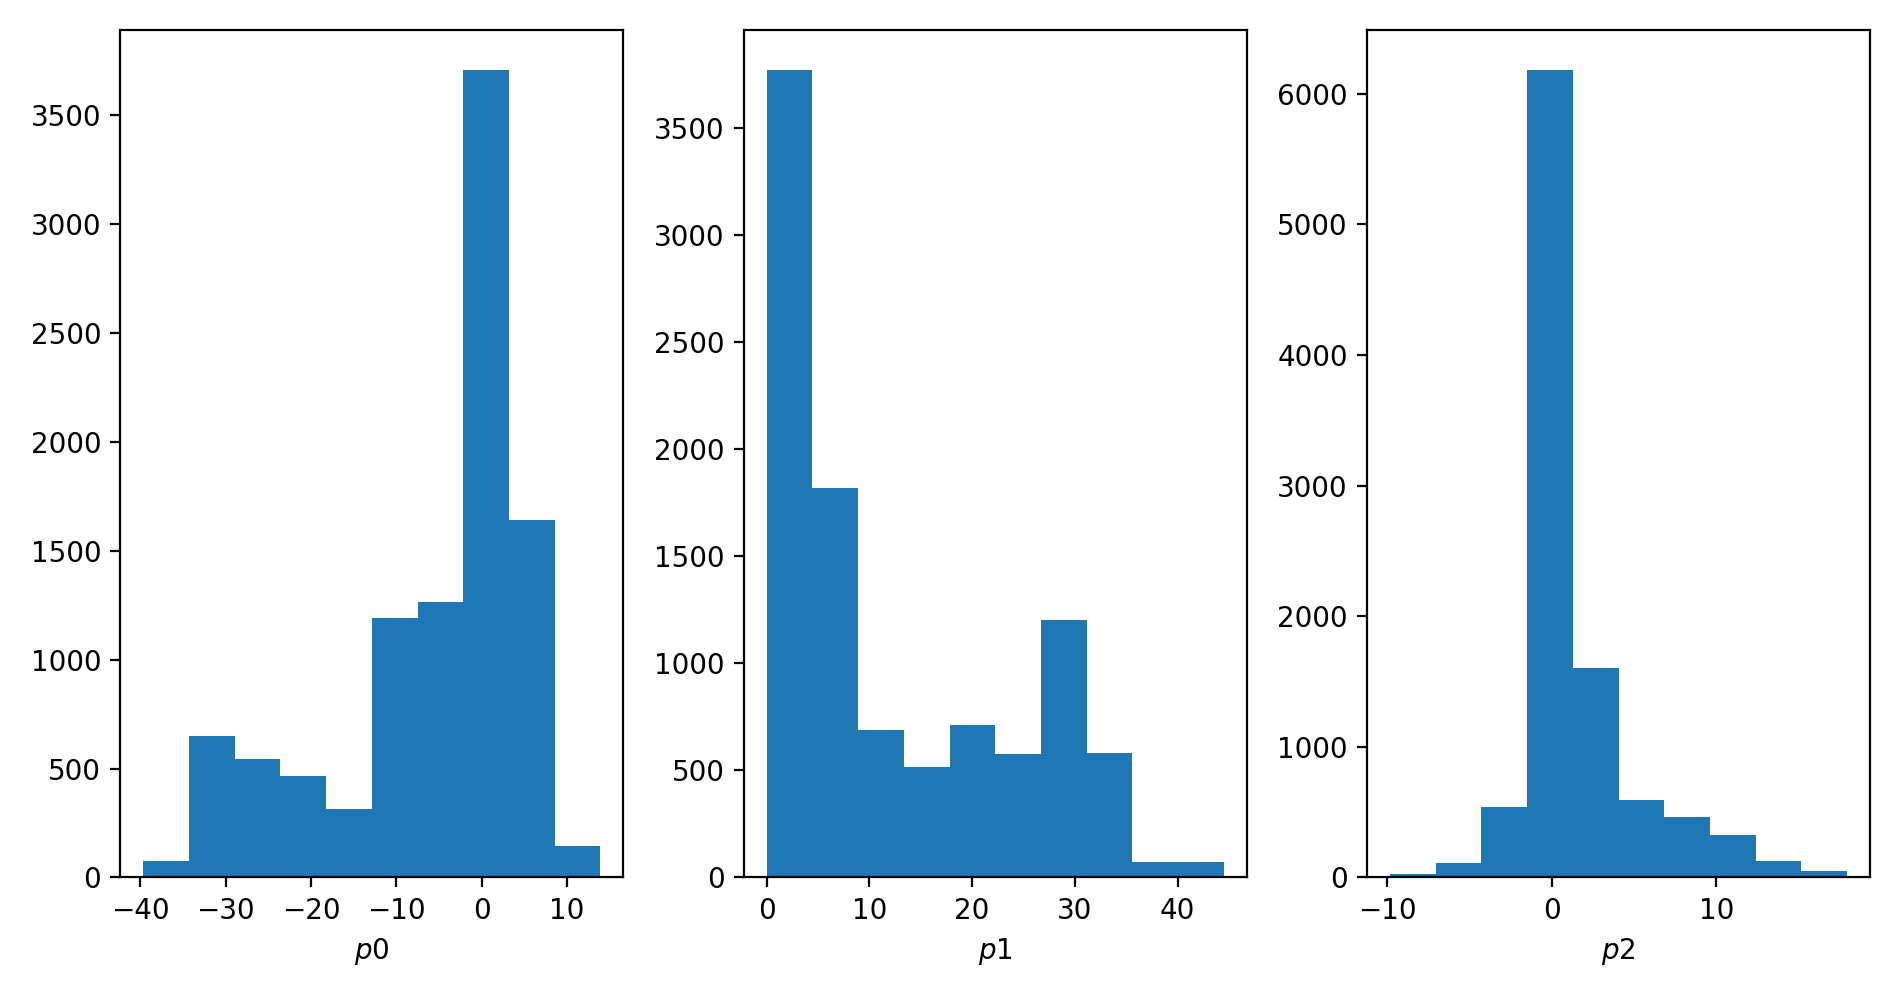

In [70]:
params = np.array(params_list)
params_fig, params_axes = plt.subplots(1, 3)
params_fig.set_figheight(5)
params_fig.set_figwidth(9.5)
for i in range(0, len(params[0])):
    params_axes[i].hist(params[:,i])
    params_axes[i].set_xlabel(f'$p{i}$')
plt.tight_layout();